In [2]:
from torchvision import datasets, transforms

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转成Tensor
    transforms.Normalize((0.1307,), (0.3081,))  # 标准化
])

# 下载训练集和测试集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


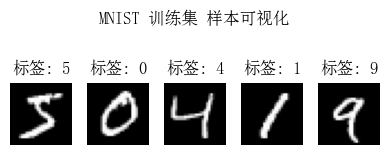

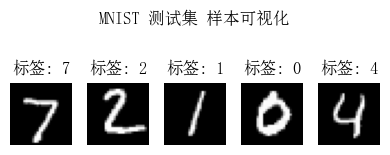

In [7]:
import matplotlib.pyplot as plt

# ----------------------------
# 关键：使用Windows自带的中文字体（确保存在）
# ----------------------------
plt.rcParams["font.family"] = ["SimSun", "SimHei", "Microsoft YaHei"]  # 宋体、黑体、微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def visualize_mnist(dataset, num_samples=5, is_train=True):
    plt.figure(figsize=(4, 2))
    
    for i in range(num_samples):
        image, label = dataset[i]
        image_np = image.squeeze().numpy()
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image_np, cmap='gray')
        plt.axis('off')
        plt.title(f"标签: {label}")  # 中文标签
    
    plt.tight_layout()
    dataset_type = "训练集" if is_train else "测试集"
    plt.suptitle(f"MNIST {dataset_type} 样本可视化", y=1.02)  # 中文标题
    plt.show()

# 执行可视化
visualize_mnist(train_dataset, num_samples=5, is_train=True)
visualize_mnist(test_dataset, num_samples=5, is_train=False)

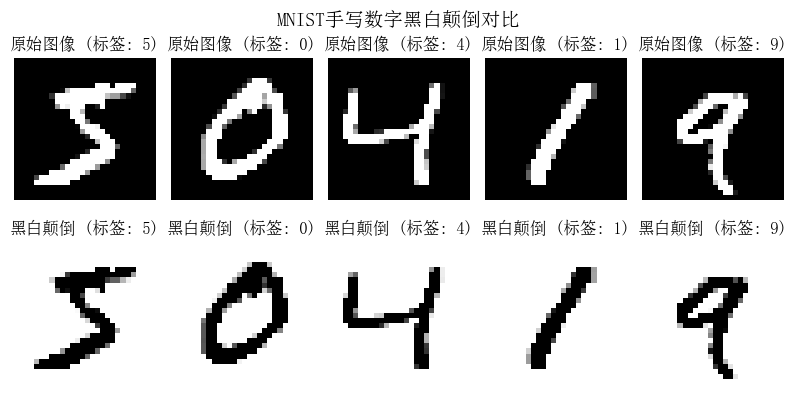

In [13]:
# ----------------------------
# 3. 黑白颠倒并可视化
# ----------------------------
def visualize_inverted_mnist(dataset, num_samples=5):
    """显示原始图像和黑白颠倒后的图像对比"""
    plt.figure(figsize=(8, 4))  # 画布大小
    
    for i in range(num_samples):
        # 获取原始图像和标签
        image, label = dataset[i]
        image_np = image.squeeze().numpy()  # 转为(28,28)的numpy数组（像素值[0,1]）
        
        # 黑白颠倒：1 - 像素值（黑色变白色，白色变黑色）
        inverted_image = 1 - image_np
        
        # 显示原始图像
        plt.subplot(2, num_samples, i + 1)  # 第一行显示原始图像
        plt.imshow(image_np, cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
        plt.title(f"原始图像 (标签: {label})")
        
        # 显示颠倒后的图像
        plt.subplot(2, num_samples, i + 1 + num_samples)  # 第二行显示颠倒图像
        plt.imshow(inverted_image, cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
        plt.title(f"黑白颠倒 (标签: {label})")
    
    plt.tight_layout()
    plt.suptitle("MNIST手写数字黑白颠倒对比", y=1.02, fontsize=14)
    plt.show()

# 可视化5个样本的对比
visualize_inverted_mnist(train_dataset, num_samples=5)

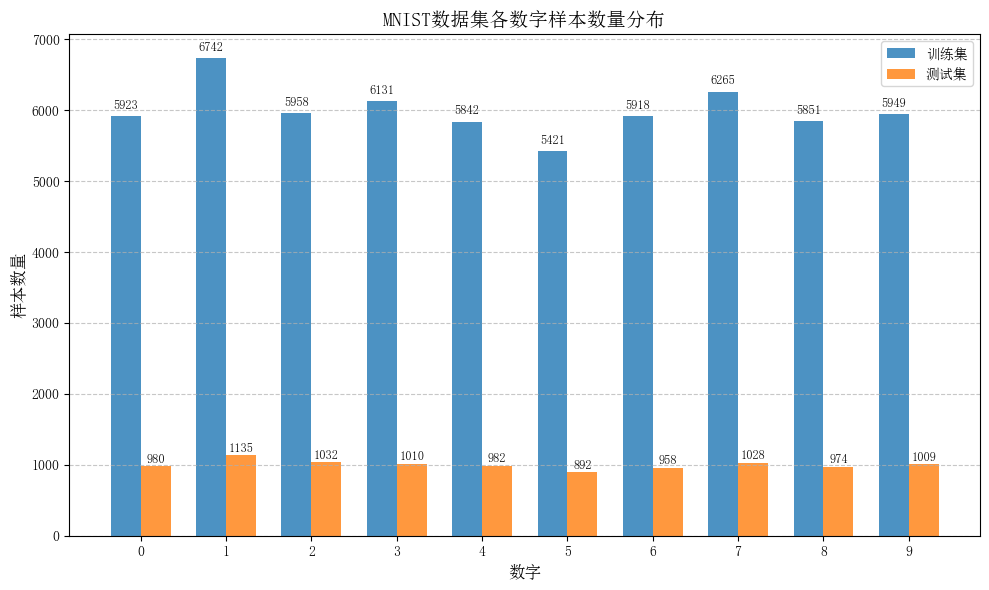

训练集各数字样本数：
数字 0: 5923 个
数字 1: 6742 个
数字 2: 5958 个
数字 3: 6131 个
数字 4: 5842 个
数字 5: 5421 个
数字 6: 5918 个
数字 7: 6265 个
数字 8: 5851 个
数字 9: 5949 个

测试集各数字样本数：
数字 0: 980 个
数字 1: 1135 个
数字 2: 1032 个
数字 3: 1010 个
数字 4: 982 个
数字 5: 892 个
数字 6: 958 个
数字 7: 1028 个
数字 8: 974 个
数字 9: 1009 个


In [10]:
import numpy as np
# ----------------------------
# 2. 统计每个数字的样本数量
# ----------------------------
def count_digits(dataset):
    """统计数据集中每个数字（0-9）的样本数量"""
    counts = np.zeros(10, dtype=int)  # 初始化0-9的计数器
    for _, label in dataset:
        counts[label] += 1  # 对应数字的计数器+1
    return counts

# 统计训练集和测试集
train_counts = count_digits(train_dataset)
test_counts = count_digits(test_dataset)

# 数字标签（0-9）
digits = np.arange(10)

# ----------------------------
# 3. 绘制柱状图
# ----------------------------
plt.figure(figsize=(10, 6))

# 设置柱状图位置（并列显示）
bar_width = 0.35
train_pos = digits - bar_width/2  # 训练集柱子位置
test_pos = digits + bar_width/2   # 测试集柱子位置

# 绘制柱状图
plt.bar(train_pos, train_counts, width=bar_width, label='训练集', color='#1f77b4', alpha=0.8)
plt.bar(test_pos, test_counts, width=bar_width, label='测试集', color='#ff7f0e', alpha=0.8)

# 添加数字标签（在柱子上方显示数量）
for i, (train_c, test_c) in enumerate(zip(train_counts, test_counts)):
    plt.text(train_pos[i], train_c + 100, f'{train_c}', ha='center', fontsize=9)
    plt.text(test_pos[i], test_c + 50, f'{test_c}', ha='center', fontsize=9)

# 设置坐标轴和标题
plt.xlabel('数字', fontsize=12)
plt.ylabel('样本数量', fontsize=12)
plt.title('MNIST数据集各数字样本数量分布', fontsize=14)
plt.xticks(digits, [str(d) for d in digits])  # x轴刻度为0-9
plt.legend()  # 显示图例
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 显示y轴网格线
plt.tight_layout()  # 调整布局

# 显示图像
plt.show()

# 打印具体统计结果
print("训练集各数字样本数：")
for d, count in enumerate(train_counts):
    print(f"数字 {d}: {count} 个")

print("\n测试集各数字样本数：")
for d, count in enumerate(test_counts):
    print(f"数字 {d}: {count} 个")